In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()
X = data.data[:, :2]
y = data.target

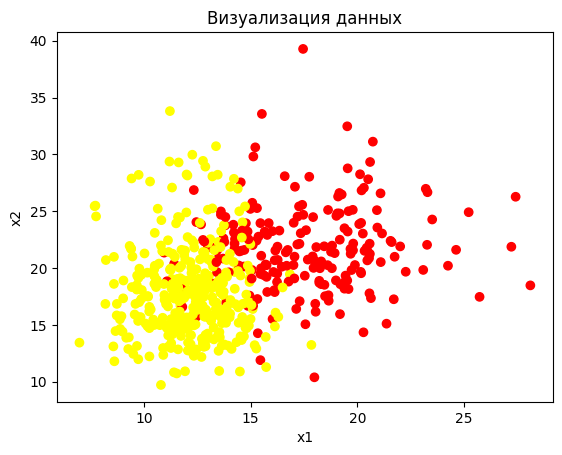

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

plt.title("Визуализация данных")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

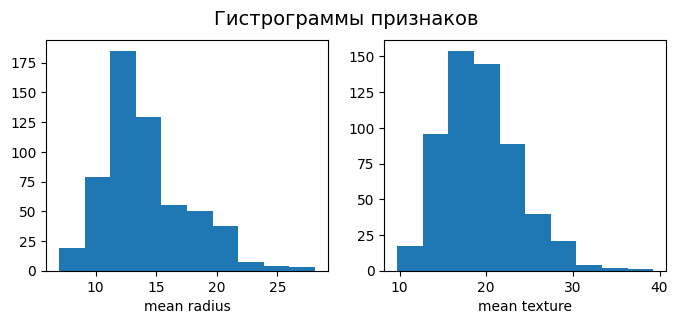

In [6]:
plt.figure(figsize=(8, 3))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистрограммы признаков', fontsize=14)
plt.show()

In [7]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)

GaussianNB()

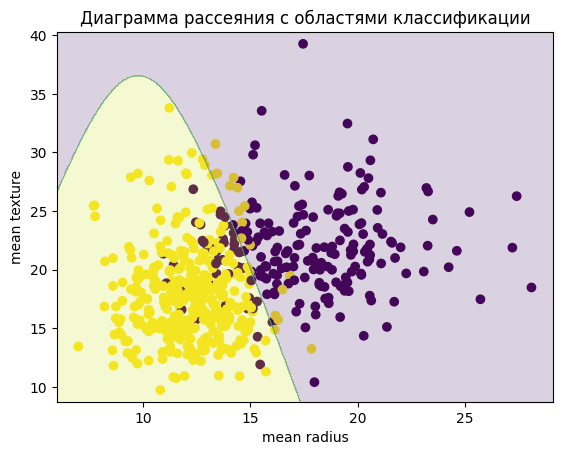

In [8]:
X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

Z = gaussian_nb.predict(XX).reshape(X0_grid.shape)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(X0_grid, X1_grid, Z, alpha=0.2)

plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [9]:
y_pred = gaussian_nb.predict(X)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(y, y_pred))
print("Accuracy= ", accuracy_score(y, y_pred))
print("F1_score= ", f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.912751677852349


In [11]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(X, y)
y_pred = mnb.predict(X)

print(confusion_matrix(y, y_pred))
print("Accuracy= ", accuracy_score(y, y_pred))
print("F1_score= ", f1_score(y, y_pred))

[[ 36 176]
 [  7 350]]
Accuracy=  0.6783831282952548
F1_score=  0.7927519818799547


In [12]:
X = data.data
y = data.target

X.shape, y.shape

((569, 30), (569,))

In [13]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy= ", accuracy_score(y, y_pred))
print("F1_score= ", f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


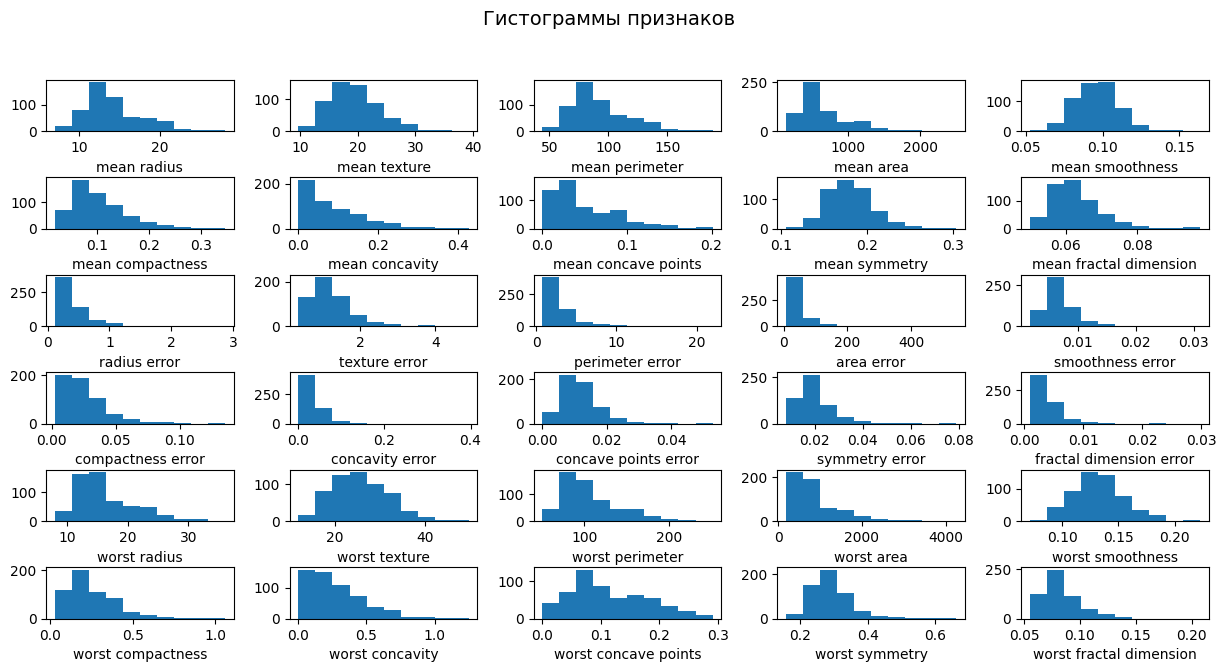

In [14]:
f = plt.figure(figsize=(15, 7))

for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])

f.subplots_adjust(hspace=0.9, wspace=0.3)
plt.suptitle("Гистограммы признаков", fontsize=14)
plt.show()

In [15]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.drop(['mean concavity','radius error',
              'perimeter error', 'area error',
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area',
              'worst concavity'],
             axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,concave points error,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.01587,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01340,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02058,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.01867,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01885,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678


In [16]:
X = df
y = data.target

X.shape, y.shape

((569, 21), (569,))

In [17]:
gaussian_nb = GaussianNB().fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[196  16]
 [ 15 342]]
Accuracy=  0.945518453427065
F1_score=  0.9566433566433566
